In [1]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
import numpy as np

In [2]:
#train_path = "./ver2/Training"
#test_path = "./ver2/Testing"
train_path = "./ver1/Training_michi"
test_path = "./ver1/Testing_michi"

In [3]:
train_files = glob(train_path + '/*/*.jp*g')
test_files = glob(test_path + '/*/*.jp*g')

In [27]:
"""
ImageDataGenerator를 쓸땐 image를 sub directory에 넣아야한다.
이때 sub directory의 path는 지정하면 안된다.
"""
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_path,
                                       target_size=(100,100),
                                       #batch_size = 32,
                                       shuffle = True,
                                       save_format='jpg')
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=test_path,
                                      target_size=(100,100),
                                      #batch_size = 32,
                                      shuffle = True,
                                      save_format='jpg')

Found 5915 images belonging to 4 classes.
Found 1480 images belonging to 4 classes.


In [43]:
from tensorflow.keras.applications.vgg16 import  VGG16
model = VGG16(weights = 'imagenet', include_top = True)

In [44]:
model = Sequential()
model.add(Conv2D(input_shape=(100,100,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [45]:
model.add(Flatten())
model.add(Dense(units=2048,activation="relu"))
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=4, activation="softmax"))

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 50, 50, 128)       147584    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 25, 25, 256)      

In [47]:
from keras.optimizers import Adam,SGD
opt = Adam(lr=0.001)
sgd = SGD(lr=1e-4, momentum=0.9)
model.compile(optimizer=sgd, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [48]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint( "vgg16_1.h5",
                               monitor = 'val_accuracy',
                               verbose = 1,
                               save_best_only = True,
                               save_weights_only = False,
                               mode = 'auto')
                               #save_freq = 1)
early = EarlyStopping(monitor = 'val_accuracy',
                       min_delta = 0,
                       patience = 20,
                       verbose = 1,
                       mode = 'auto')

hist = model.fit_generator(steps_per_epoch = (len(train_files)/32),
                            generator = traindata,
                            validation_data = testdata,
                            validation_steps = (len(test_files)/32),
                            epochs = 5,
                            callbacks = [checkpoint,early])


Epoch 1/5
185/184 [==============================] - ETA: 0s - loss: 1.0264 - accuracy: 0.5843
Epoch 00001: val_accuracy improved from -inf to 0.72500, saving model to vgg16_1.h5
185/184 [==============================] - 1055s 6s/step - loss: 1.0264 - accuracy: 0.5843 - val_loss: 0.6949 - val_accuracy: 0.7250
Epoch 2/5
185/184 [==============================] - ETA: 0s - loss: 0.4844 - accuracy: 0.8260
Epoch 00002: val_accuracy improved from 0.72500 to 0.79595, saving model to vgg16_1.h5
185/184 [==============================] - 1033s 6s/step - loss: 0.4844 - accuracy: 0.8260 - val_loss: 0.5405 - val_accuracy: 0.7959
Epoch 3/5
185/184 [==============================] - ETA: 0s - loss: 0.4352 - accuracy: 0.8460
Epoch 00003: val_accuracy improved from 0.79595 to 0.85068, saving model to vgg16_1.h5
185/184 [==============================] - 1052s 6s/step - loss: 0.4352 - accuracy: 0.8460 - val_loss: 0.4095 - val_accuracy: 0.8507
Epoch 4/5
185/184 [==============================] - ETA: 

accuracy
[0.5842772722244263, 0.8260354995727539, 0.8459847569465637, 0.8764159083366394, 0.8904480338096619]
val_accuracy
[0.7250000238418579, 0.795945942401886, 0.8506757020950317, 0.8243243098258972, 0.8999999761581421]


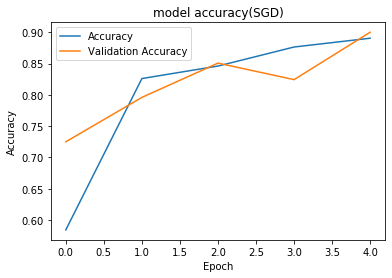

In [56]:
import matplotlib.pyplot as plt
print("accuracy")
print(hist.history["accuracy"])
print("val_accuracy")
print(hist.history["val_accuracy"])

plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy(SGD)")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

loss
[1.026404619216919, 0.4843602776527405, 0.43518608808517456, 0.34602823853492737, 0.29551318287849426]
val_loss
[0.694939911365509, 0.540521502494812, 0.40948745608329773, 0.4349801540374756, 0.2865757346153259]


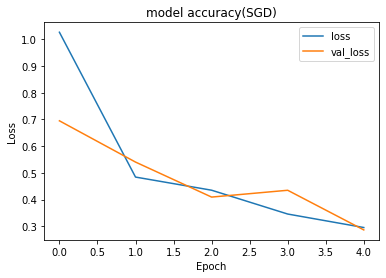

In [57]:
print("loss")
print(hist.history["loss"])
print("val_loss")
print(hist.history["val_loss"])

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy(SGD)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","val_loss"])
plt.show()

In [58]:
tedata = ImageDataGenerator()
testdata = tedata.flow_from_directory(directory = test_path,
                                      target_size = (100,100))

Found 1480 images belonging to 4 classes.


In [59]:
# evaluate() : モデルの妥当性・性能を確認する
# (loss, accuracy)
print(model.evaluate(testdata, verbose = 0))

# decode_predictions(prediction,top =)
# decode_predictions는 (num_samples,1000)를 만족하지 않으면 쓸 수 없다.

[0.28657564520835876, 0.8999999761581421]


green_onions
bean_sprouts
bean_sprouts
green_onions
potatoes
bean_sprouts
bean_sprouts
green_onions
chicken
green_onions


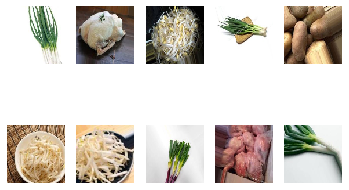

In [87]:
import random
import matplotlib.pyplot as plt

pre_test = [random.randint(0,len(test_files)) for i in range(10)]
imgshow = []
for i in pre_test:
    img = image.load_img(test_files[i],target_size = (100,100))
    img = np.asarray(img)
    img = np.expand_dims(img, axis = 0)
    
    output = model.predict(img)
    if output[0][0] > output[0][1] and output[0][0] > output[0][2] and output[0][0] > output[0][3]:
        print("bean_sprouts")
        img = np.squeeze(img, axis = 0)
        imgshow.append(img)
    elif output[0][1] > output[0][0] and output[0][1] > output[0][2] and output[0][1] > output[0][3]:
        print("chicken")   
        img = np.squeeze(img, axis = 0) 
        imgshow.append(img)
    elif output[0][2] > output[0][0] and output[0][2] > output[0][1] and output[0][2] > output[0][3]:
        print("green_onions")
        img = np.squeeze(img, axis = 0)
        imgshow.append(img)
    else:
        print("potatoes")
        img = np.squeeze(img, axis = 0)
        imgshow.append(img)

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(imgshow[i])
    plt.axis("off")